In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import tensorflow_hub as hub
import os

from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras import optimizers

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [2]:
print("Version ", tf.__version__)
print("Eager mode:", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is","available" if tf.test.is_gpu_available() else"Not Available")

Version  2.8.0
Eager mode: True
Hub version:  0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is Not Available


# Loading Dataset

In [3]:
import os, sys

# Create new Train and val folders

base_dir = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs'
train_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/train'
val_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/validation'

column_names = os.listdir(train_path)
for i in column_names:
    os.makedirs(f'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/output/train/{i}')
    os.makedirs(f'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/output/validation/{i}')

out_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/output/train/'

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/output/train/BrownSpot'

# Resize image

In [4]:
from PIL import Image
def resize(input_path,folder,column_name):
    dirs = os.listdir(input_path)
    for item in dirs:
        item_path = input_path +'/' +item
        if os.path.isfile(item_path):
            #print('CHECK')
            im = Image.open(item_path)

            # Check whether the specified 
            # path exists or not 
            outpath = f'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/output/{folder}/{column_name}'
            temp_out_path = outpath+'/'+item
            f, e = os.path.splitext(temp_out_path)

            imResize = im.resize((255,255), Image.ANTIALIAS)
            #print('CHECK 3')
            imResize.save(f + '.jpg', 'JPEG', quality=90)

In [5]:
input_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/train/Healthy'
folder = 'train'
column_name = 'Healthy'
resize(input_path,folder,column_name)

input_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/train/BrownSpot'
folder = 'train'
column_name = 'BrownSpot'
resize(input_path,folder,column_name)

input_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/train/Hispa'
folder = 'train'
column_name = 'Hispa'
resize(input_path,folder,column_name)

input_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/train/LeafBlast'
folder = 'train'
column_name = 'LeafBlast'
resize(input_path,folder,column_name)

print('Done with train resizing')

Done with train resizing


In [6]:
## VALIDATION
input_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/validation/Healthy'
folder = 'validation'
column_name = 'Healthy'
resize(input_path,folder,column_name)

input_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/validation/BrownSpot'
folder = 'validation'
column_name = 'BrownSpot'
resize(input_path,folder,column_name)

input_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/validation/Hispa'
folder = 'validation'
column_name = 'Hispa'
resize(input_path,folder,column_name)

input_path = 'D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/validation/LeafBlast'
folder = 'validation'
column_name = 'LeafBlast'
resize(input_path,folder,column_name)

print('Done with Validation resizing')

Done with Validation resizing


In [7]:
os.path.exists('D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/output/validation/Healthy/')

True

In [8]:
os.path.exists('D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/output/train/')
os.path.exists('D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/output/validation/')

True

In [9]:
os.listdir('D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/output/train/BrownSpot/')

['IMG_20190420_190157.jpg',
 'IMG_20190420_190201.jpg',
 'IMG_20190420_190208.jpg',
 'IMG_20190420_190217.jpg',
 'IMG_20190420_190225.jpg',
 'IMG_20190420_190227.jpg',
 'IMG_20190420_190239.jpg',
 'IMG_20190420_190243.jpg',
 'IMG_20190420_190246.jpg',
 'IMG_20190420_190248.jpg',
 'IMG_20190420_190255.jpg',
 'IMG_20190420_190305.jpg',
 'IMG_20190420_190308.jpg',
 'IMG_20190420_190316.jpg',
 'IMG_20190420_190323.jpg',
 'IMG_20190420_190330.jpg',
 'IMG_20190420_190334.jpg',
 'IMG_20190420_190338.jpg',
 'IMG_20190420_190344.jpg',
 'IMG_20190420_190356.jpg',
 'IMG_20190420_190359.jpg',
 'IMG_20190420_190403.jpg',
 'IMG_20190420_190411.jpg',
 'IMG_20190420_190414.jpg',
 'IMG_20190420_190416.jpg',
 'IMG_20190420_190419.jpg',
 'IMG_20190420_190427.jpg',
 'IMG_20190420_190432.jpg',
 'IMG_20190420_190437.jpg',
 'IMG_20190420_190445.jpg',
 'IMG_20190420_190517.jpg',
 'IMG_20190420_190520.jpg',
 'IMG_20190420_190524.jpg',
 'IMG_20190420_190526.jpg',
 'IMG_20190420_190551.jpg',
 'IMG_20190420_19055

In [10]:
data_dir = os.path.join(os.path.dirname('D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/'), 'output')

# Split train and val

In [11]:
# Use this if you avoided the resizing
#data_dir = os.path.join(os.path.dirname('output/'), 'RiceLeafs')

In [12]:
train_dir = os.path.join('D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/train/')
train_BrownSpot_dir = os.path.join(train_dir, 'BrownSpot')
print(train_BrownSpot_dir)
train_Healthy_dir = os.path.join(train_dir, 'Healthy')
train_Hispa_dir = os.path.join(train_dir, 'Hispa')
train_LeafBlast_dir = os.path.join(train_dir, 'LeafBlast')


validation_dir = os.path.join('D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/validation/')
validation_BrownSpot_dir = os.path.join(validation_dir, 'BrownSpot')
validation_Healthy_dir = os.path.join(validation_dir, 'Healthy')
validation_Hispa_dir = os.path.join(validation_dir, 'Hispa')
validation_LeafBlast_dir = os.path.join(validation_dir, 'LeafBlast')

D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/train/BrownSpot


In [13]:
train_BrownSpot_names = os.listdir(train_BrownSpot_dir)
print(train_BrownSpot_names[:10])

train_Healthy_names =  os.listdir(train_Healthy_dir)
print(train_Healthy_names[:10])

train_Hispa_names = os.listdir(train_Hispa_dir)
print(train_Hispa_names[:10])

train_LeafBlast_names =  os.listdir(train_LeafBlast_dir)
print(train_LeafBlast_names[:10])

['IMG_20190420_190157.jpg', 'IMG_20190420_190201.jpg', 'IMG_20190420_190208.jpg', 'IMG_20190420_190217.jpg', 'IMG_20190420_190225.jpg', 'IMG_20190420_190227.jpg', 'IMG_20190420_190239.jpg', 'IMG_20190420_190243.jpg', 'IMG_20190420_190246.jpg', 'IMG_20190420_190248.jpg']
['IMG_20190419_123623.jpg', 'IMG_20190419_123631.jpg', 'IMG_20190419_123642.jpg', 'IMG_20190419_123646.jpg', 'IMG_20190419_123649.jpg', 'IMG_20190419_123656.jpg', 'IMG_20190419_123658.jpg', 'IMG_20190419_123701.jpg', 'IMG_20190419_123704.jpg', 'IMG_20190419_123709.jpg']
['IMG_20190419_131420.jpg', 'IMG_20190419_131449.jpg', 'IMG_20190419_131458.jpg', 'IMG_20190419_131503.jpg', 'IMG_20190419_131606.jpg', 'IMG_20190419_133810.jpg', 'IMG_20190419_134302.jpg', 'IMG_20190419_134304.jpg', 'IMG_20190419_134311.jpg', 'IMG_20190419_134321.jpg']
['IMG_20190419_095029.jpg', 'IMG_20190419_095031.jpg', 'IMG_20190419_095429.jpg', 'IMG_20190419_095439.jpg', 'IMG_20190419_095523.jpg', 'IMG_20190419_100501.jpg', 'IMG_20190419_100509.jpg

# IMG count

In [14]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + " files"

print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))

total images for training : D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/train/ : 2684 files
total images for validation : D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/validation/ : 671 files


In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Parameters for our graph; we'll outpu images in a 4x4 configuration
nrows = 4
ncols = 4

# for iternating over images
pic_index = 0

# Brown spot

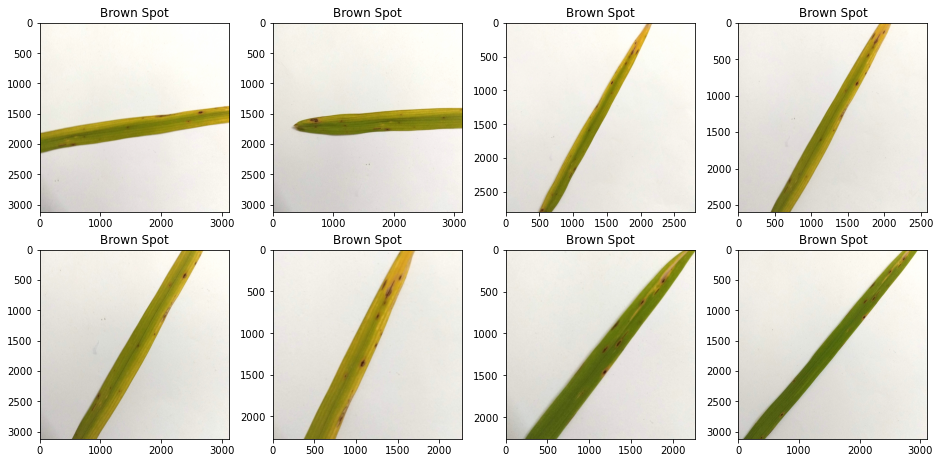

In [16]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_BrownSpot_pix = [os.path.join(train_BrownSpot_dir, fname)
                for fname in train_BrownSpot_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_BrownSpot_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title("Brown Spot")

plt.show()

In [17]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("file:///D:/Thirumalai2/venkat-main/index1.html")
driver.maximize_window()
time.sleep(10)



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been s

# Healthy

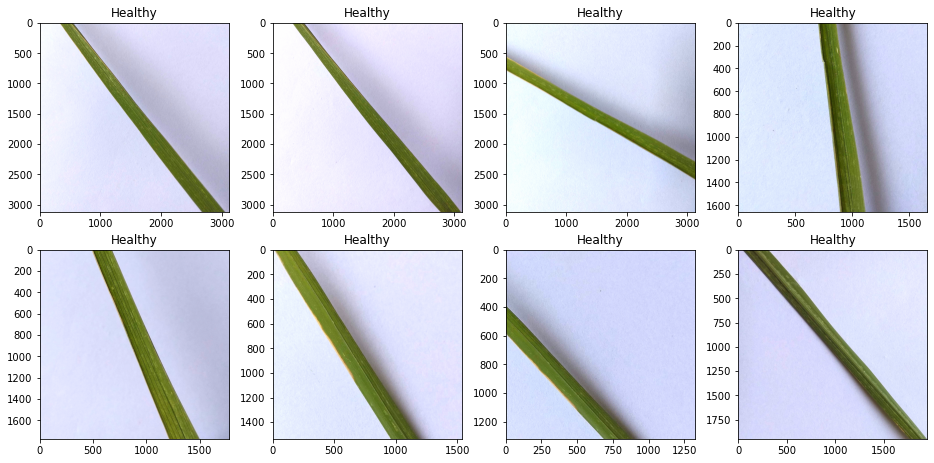

In [18]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8
next_Healthy_pix = [os.path.join(train_Healthy_dir, fname)
                for fname in train_Healthy_names[pic_index-8:pic_index]]


for i, img_path in enumerate(next_Healthy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title("Healthy")

plt.show()

# Hispa

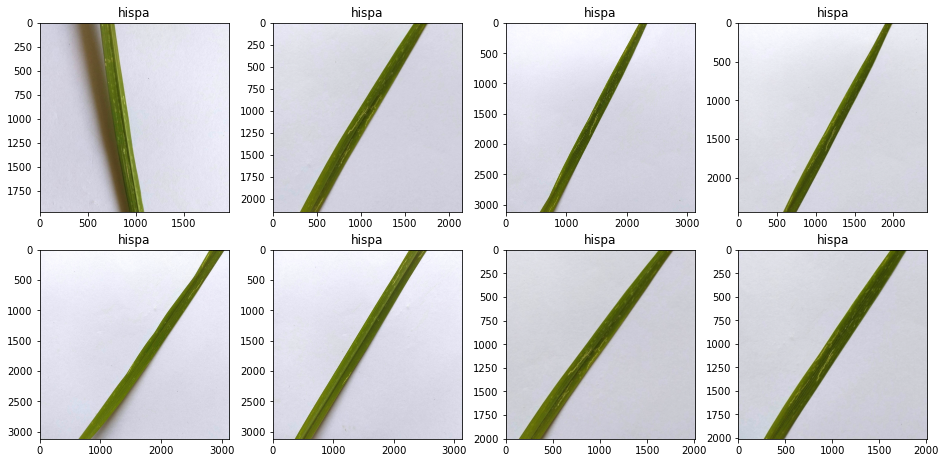

In [19]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8

next_Hispa_pix = [os.path.join(train_Hispa_dir, fname)
                for fname in train_Hispa_names[pic_index-8:pic_index]]


for i, img_path in enumerate(next_Hispa_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title('hispa')

plt.show()

In [20]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("file:///D:/Thirumalai2/venkat-main/index2.html")
driver.maximize_window()
time.sleep(10)



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been s

# Leaf-Blast

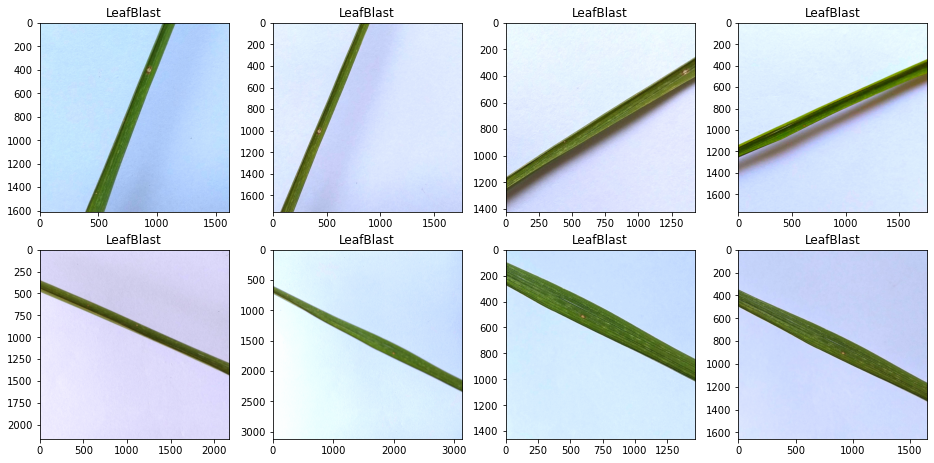

In [21]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)

pic_index += 8

next_LeafBlast_pix = [os.path.join(train_LeafBlast_dir, fname)
                for fname in train_LeafBlast_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_LeafBlast_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i +1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title('LeafBlast')

plt.show()

In [22]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("D:/Thirumalai/37008/Website/index3.html")
driver.maximize_window()
time.sleep(10)



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been s

# Data Augmentation and Generators

In [23]:
IMAGE_SHAPE = (244, 244)
#img = np.reshape(IMAGE_SHAPE,[1,240,240,3])
BATCH_SIZE = 64 

In [24]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)
print(train_dir)

Found 671 images belonging to 4 classes.
Found 2684 images belonging to 4 classes.
D:/Thirumalai/37008/RICELEAFCLASSIFICATION/NEW/RiceLeafs/train/


In [25]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,log = {}):
    if(log.get('accuracy')> 0.99):
      if(log.get('val_accuracy')>0.99):
        print("\n Reached 99% Accuracy for both train and val.")
        self.model.stop_training = True

callbacks = MyCallback()

# Model

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (244,244,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4,activation = 'softmax')

],    name = 'Conv2D_Model')

model.summary()

Model: "Conv2D_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)      

In [27]:
LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks = [callbacks],
        validation_steps=validation_generator.samples//validation_generator.batch_size)

<ipython-input-28-7d63d82d3b8c>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
41/41 [==============================] - 421s 10s/step - loss: 1.3118 - accuracy: 0.4256 - val_loss: 1.2814 - val_accuracy: 0.4641
Epoch 2/10
41/41 [==============================] - 432s 11s/step - loss: 1.1998 - accuracy: 0.4721 - val_loss: 1.5907 - val_accuracy: 0.4297
Epoch 3/10
41/41 [==============================] - 416s 10s/step - loss: 1.0839 - accuracy: 0.5546 - val_loss: 1.6699 - val_accuracy: 0.3016
Epoch 4/10
41/41 [==============================] - 421s 10s/step - loss: 1.0386 - accuracy: 0.5870 - val_loss: 2.2678 - val_accuracy: 0.1141
Epoch 5/10
41/41 [==============================] - 432s 11s/step - loss: 1.0029 - accuracy: 0.6069 - val_loss: 1.8886 - val_accuracy: 0.2156
Epoch 6/10
41/41 [==============================] - 432s 11s/step - loss: 0.9939 - accuracy: 0.6095 - val_loss: 1.9472 - val_accuracy: 0.1688
Epoch 7/10
41/41 [==============================] - 451s 11s/step - loss: 0.9849 - accuracy: 0.6004 - val_loss: 2.1407 - val_accuracy: 0.1797
Epoch 

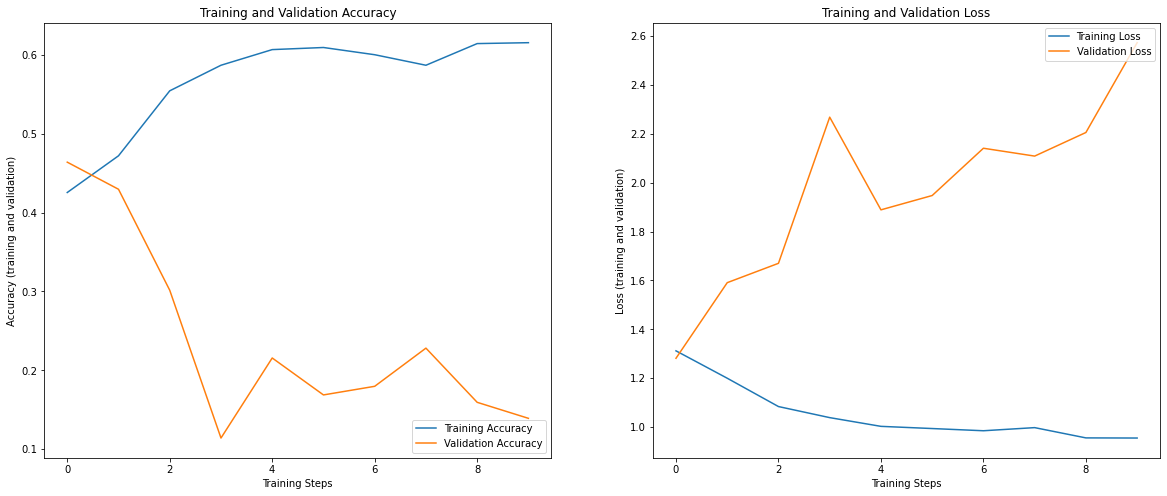

In [29]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

<ipython-input-30-3bbc36b46240>:45: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


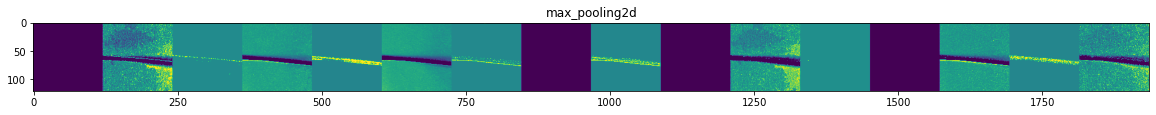

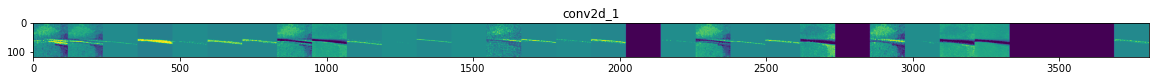

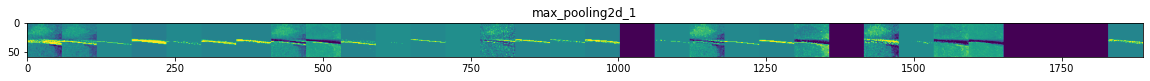

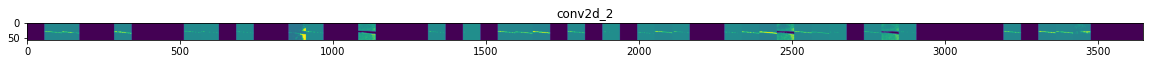

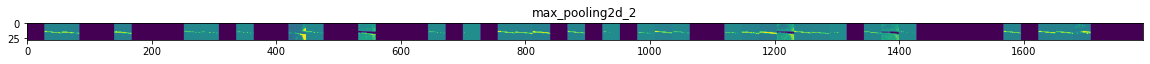

In [30]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img


successive_outputs = [layer.output for layer in model.layers[1:]]

# Visualization_model = Model(img_input,successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input,
                                            outputs = successive_outputs)

# Lets prepare a random input image form the training set.

BrownSpot_img_files = [os.path.join(train_BrownSpot_dir, f) for f in train_BrownSpot_names]
Healthy_files = [os.path.join(train_Healthy_dir, f) for f in train_Healthy_names]
img_path = random.choice(BrownSpot_img_files + Healthy_files)


img = load_img(img_path,target_size = (244,244)) # This is a PIL image
x = img_to_array(img)  # Numpy array with shape (244,244,3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1,244,244,3)

# Rescale by 1/255
x /=255

successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers so we can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]


# Now lets display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv/maxpool layers, for the fully-connected layers
    n_features = feature_map.shape[-1] # number of features in feature map
    # The feature map has shape (1,size,size,n_features)
    size = feature_map.shape[1]
    # We will title our images in this matrix
    display_grid = np.zeros((size, size* n_features))
    for i in range(n_features):
      # Post process the feature to make it visibly palatable
      x = feature_map[0,:,:,i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x+= 128
      x = np.clip(x,0,255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:,i*size:(i+1)*size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale*n_features,scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect = 'auto', cmap = 'viridis')

# Inception

In [31]:
import tensorflow as tf
import tensorflow_hub as hub
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),

  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.build([None, 244, 244, 3])

In [32]:
#Compile model specifying the optimizer learning rate

LEARNING_RATE = 0.0001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

C:\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        #callbacks = [callbacks],
        validation_steps=validation_generator.samples//validation_generator.batch_size)

<ipython-input-33-e912f1451000>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
41/41 [==============================] - 884s 21s/step - loss: 1.0996 - accuracy: 0.5374 - val_loss: 1.1863 - val_accuracy: 0.4953
Epoch 2/10
41/41 [==============================] - 854s 21s/step - loss: 0.8883 - accuracy: 0.6588 - val_loss: 1.1822 - val_accuracy: 0.5063
Epoch 3/10
41/41 [==============================] - 865s 21s/step - loss: 0.8237 - accuracy: 0.6737 - val_loss: 1.1948 - val_accuracy: 0.4984
Epoch 4/10
41/41 [==============================] - 1079s 26s/step - loss: 0.7699 - accuracy: 0.7057 - val_loss: 1.2098 - val_accuracy: 0.5094
Epoch 5/10
41/41 [==============================] - 1105s 27s/step - loss: 0.7495 - accuracy: 0.6989 - val_loss: 1.2615 - val_accuracy: 0.4656
Epoch 6/10
41/41 [==============================] - 1095s 27s/step - loss: 0.7336 - accuracy: 0.7134 - val_loss: 1.3235 - val_accuracy: 0.4281
Epoch 7/10
41/41 [==============================] - 1059s 26s/step - loss: 0.7132 - accuracy: 0.7240 - val_loss: 1.3306 - val_accuracy: 0.4703
Ep

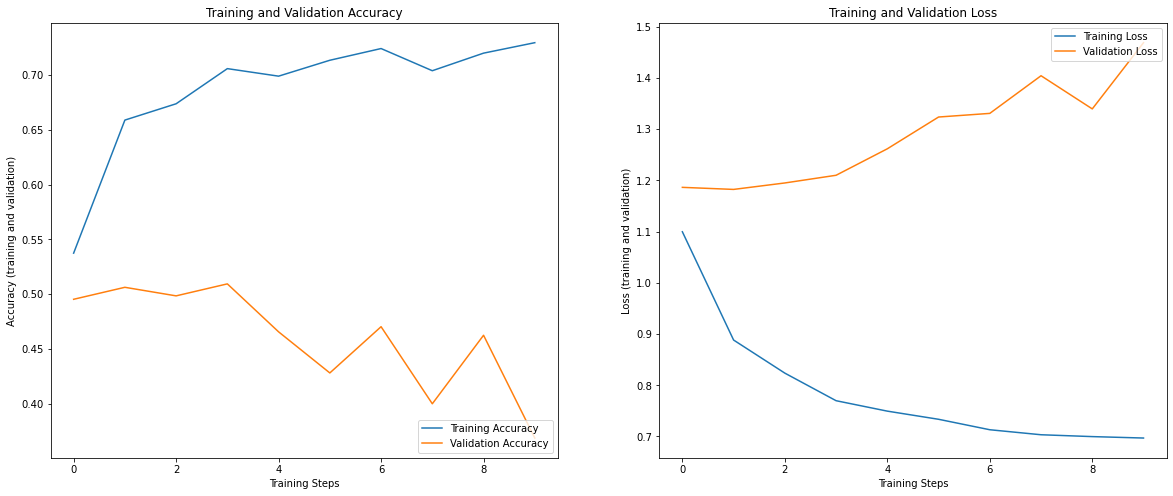

In [34]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,log = {}):
    if(log.get('accuracy')> 0.99):
      if(log.get('val_accuracy')>0.99):
        print("\n Reached 99% Accuracy for both train and val.")
        self.model.stop_training = True

callbacks = MyCallback()

# CNN with LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
num_classes = 4
input_shape = 244,244,3
def model2d(input_shape, num_classes):

    model = keras.Sequential(name='model2d')

    #LFLB1
    model.add(layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=1,
                            padding='same',
                            # data_format='channels_first',
                            input_shape=input_shape
                            )
              )
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2))

    #LFLB2
    model.add(layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=1,
                            padding='same',
                            )
              )
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.MaxPooling2D(pool_size=4, strides=4))

    #LFLB3
    model.add(layers.Conv2D(filters=128,
                            kernel_size=3,
                            strides=1,
                            padding='same',
                            )
              )
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.MaxPooling2D(pool_size=4, strides=4))

    #LFLB4
    model.add(layers.Conv2D(filters=128,
                            kernel_size=3,
                            strides=1,
                            padding='same'
                            )
              )
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.MaxPooling2D(pool_size=4, strides=4))

    model.add(layers.Reshape((-1, 128)))

    #LSTM
    model.add(layers.LSTM(32))

    model.add(layers.Dense(units=num_classes, activation='softmax'))

model.summary()

   
    #return model 

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0006, decay=1e-6)

model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy']
                  )


In [ ]:
EPOCHS=1 #@param {type:"integer"}
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        #callbacks = [callbacks],
        validation_steps=validation_generator.samples//validation_generator.batch_size)

# Predict

In [35]:
IMAGE_SHAPE[0]

244

In [36]:
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(data_dir, validation_dir, filename))
    img = cv2.resize(img,(IMAGE_SHAPE[0], IMAGE_SHAPE[1]) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    print(probabilities)
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

SOURCE: class: Hispa, file: Hispa\IMG_20190419_095930.jpg


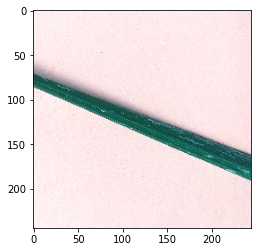

<Figure size 432x288 with 0 Axes>

SOURCE: class: Healthy, file: Healthy\IMG_20190419_115209.jpg


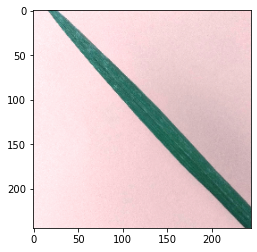

SOURCE: class: BrownSpot, file: BrownSpot\IMG_20190419_161753.jpg


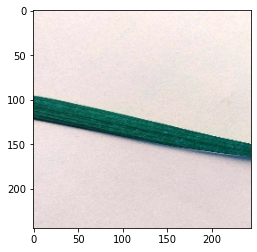

<Figure size 432x288 with 0 Axes>

SOURCE: class: Hispa, file: Hispa\IMG_20190419_124748.jpg


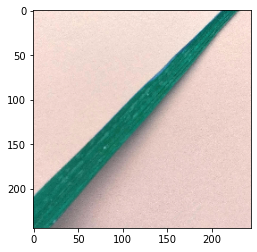

<Figure size 432x288 with 0 Axes>

SOURCE: class: Healthy, file: Healthy\IMG_20190419_100522.jpg


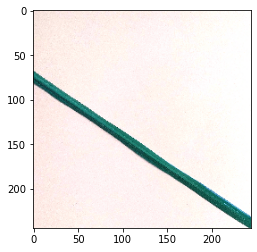

<Figure size 432x288 with 0 Axes>

In [37]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()